In [49]:
from math import comb as C
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from tqdm import tqdm
from loguru import logger

## 习题1.5.1

假设每个人都等可能地出生在一年中的任何一个月里. 如果两个人的出生月份是相互独立的, 那么他们出生在同一个月的概率是多少?

他们的出生月份最多相差一个月的概率是多少?

对于任意的$k\in\{0,1,2,...,12\}$,求他们的出生月份最多相差k个月的概率. 你对两个人的出生月份最多相差一个月的可能性感到惊讶吗?

##### Answer

In [11]:
# 第一问
numerator = C(12, 1) * 1
denominator = C(12, 1) * C(12, 1)
ans = numerator / denominator
print(f"{numerator=}, {denominator=}, {ans=:.3f}")

numerator=12, denominator=144, ans=0.083


In [12]:
# 第二问
numerator = C(12, 1) * C(3, 1)
denominator = C(12, 1) * C(12, 1)
ans = numerator / denominator
print(f"{numerator=}, {denominator=}, {ans=:.3f}")

numerator=36, denominator=144, ans=0.250


In [19]:
# 第三问
def prob(k=0):
    numerator = C(12, 1) * min(C(2 * k + 1, 1), C(12, 1))
    denominator = C(12, 1) * C(12, 1)
    return numerator / denominator

for k in range(13):
    print(f"{k=}, {prob(k)=:.5f}")

k=0, prob(k)=0.08333
k=1, prob(k)=0.25000
k=2, prob(k)=0.41667
k=3, prob(k)=0.58333
k=4, prob(k)=0.75000
k=5, prob(k)=0.91667
k=6, prob(k)=1.00000
k=7, prob(k)=1.00000
k=8, prob(k)=1.00000
k=9, prob(k)=1.00000
k=10, prob(k)=1.00000
k=11, prob(k)=1.00000
k=12, prob(k)=1.00000


##### random sample to validate the answer

In [21]:
num_trials = 1000000
success = 0
a = np.random.randint(12, size=num_trials)
b = np.random.randint(12, size=num_trials)
abs_diff = np.abs(a - b)

# k == 0
print((abs_diff == 0).sum() / num_trials)

for k in range(13):
    print(f"{k=}, prob={(np.minimum(abs_diff, 12 - abs_diff) <= k).sum() / num_trials:.5f}")

0.083718
k=0, prob=0.08372
k=1, prob=0.25040
k=2, prob=0.41681
k=3, prob=0.58362
k=4, prob=0.75005
k=5, prob=0.91693
k=6, prob=1.00000
k=7, prob=1.00000
k=8, prob=1.00000
k=9, prob=1.00000
k=10, prob=1.00000
k=11, prob=1.00000
k=12, prob=1.00000


###### explanation

| A   | B | abs_diff | min(abs_diff, 12 - abs_diff) |
| --- | --- | --- | --- |
|1| 1| 0 |0|
|1| 2| 1 |1|
|1| 3| 2 |2|
|1| 4| 3 |3|
|1| 5| 4 |4|
|1| 6| 5 |5|
|1| 7| 6 |6|
|1| 8| 7 |5|
|1| 9| 8 |4|
|1|10| 9 |3|
|1|11| 10 |2|
|1|12| 11 |1|

## 习题1.5.2

保留生日问题中的条件不变, 并假设每次只有一个人进入房间. 首次与房间里其他人生 日相同的人最有可能第几个进入房间?

##### Validation by Random Sampling

In [53]:
num_trials = 1000000
history = []
for _ in tqdm(range(num_trials)):
    birthdays = np.random.randint(365, size=366)
#     registry = 0
    for i, d in enumerate(birthdays):
        if d in birthdays[:i]:
            history.append(i + 1)
            break

100%|██████████| 1000000/1000000 [00:50<00:00, 19763.34it/s]


In [56]:
print(len(history))
print(mode(history))

1000000
ModeResult(mode=array([21]), count=array([32278]))


(array([1.6551e+04, 2.4312e+04, 5.4629e+04, 4.6507e+04, 5.3537e+04,
        8.9044e+04, 6.3220e+04, 6.4187e+04, 9.5955e+04, 6.0863e+04,
        8.5586e+04, 5.2017e+04, 4.6794e+04, 6.1089e+04, 3.4444e+04,
        2.9458e+04, 3.5903e+04, 1.8627e+04, 2.2018e+04, 1.1011e+04,
        8.6390e+03, 9.4160e+03, 4.5310e+03, 3.3710e+03, 3.3640e+03,
        1.4830e+03, 1.4770e+03, 6.2500e+02, 4.6200e+02, 4.2800e+02,
        1.7100e+02, 1.0800e+02, 8.4000e+01, 3.6000e+01, 2.9000e+01,
        9.0000e+00, 8.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 2.   ,  4.375,  6.75 ,  9.125, 11.5  , 13.875, 16.25 , 18.625,
        21.   , 23.375, 25.75 , 28.125, 30.5  , 32.875, 35.25 , 37.625,
        40.   , 42.375, 44.75 , 47.125, 49.5  , 51.875, 54.25 , 56.625,
        59.   , 61.375, 63.75 , 66.125, 68.5  , 70.875, 73.25 , 75.625,
        78.   , 80.375, 82.75 , 85.125, 87.5  , 89.875, 92.25 , 94.625,
        97.   ]),
 <BarContainer object of 40 artists>)

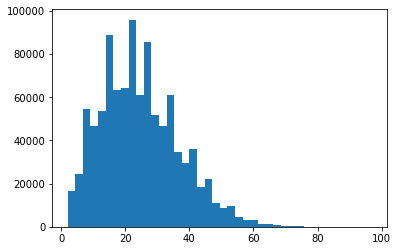

In [55]:
plt.hist(history, bins=40)